In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:04<00:00, 43.4MB/s]
100% 163M/163M [00:04<00:00, 39.3MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependenies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #When you import matplotlib.image as mpimg, you can use its functions to read and display image files within your Python code.
import cv2 # cv2 is a Python library that provides functions for computer vision and image processing. 
from google.colab.patches import cv2_imshow # cv2_imshow is a function provided by the google.colab.patches module that allows you to display images directly within a Google Colaboratory notebook.
from PIL import Image # PIL stands for Python Imaging Library, and Image is a module within the PIL library that provides a way to work with images in Python.
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5]) #first 5 files
print(with_mask_files[-5:]) #last 5 files


['with_mask_3316.jpg', 'with_mask_984.jpg', 'with_mask_1480.jpg', 'with_mask_1935.jpg', 'with_mask_1688.jpg']
['with_mask_3026.jpg', 'with_mask_2591.jpg', 'with_mask_2271.jpg', 'with_mask_2939.jpg', 'with_mask_754.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1835.jpg', 'without_mask_2695.jpg', 'without_mask_3728.jpg', 'without_mask_2566.jpg', 'without_mask_400.jpg']
['without_mask_1778.jpg', 'without_mask_1842.jpg', 'without_mask_3121.jpg', 'without_mask_947.jpg', 'without_mask_3294.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying with mask image

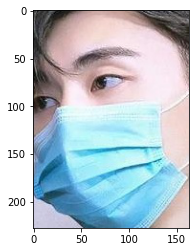

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg') # mpimg.imread(): This function reads an image file into a NumPy array.
imgplot = plt.imshow(img) # mpimg.imshow(): This function displays an image file or a NumPy array as an image.
plt.show()

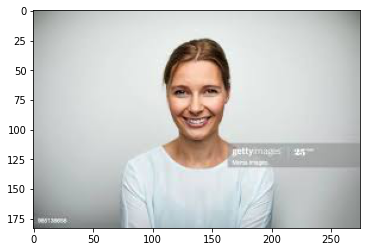

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2940.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.Resize the Images

2.Convert the images to numpy arrays


In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128)) # height of the image is 128, width of the image is 128
  image = image.convert('RGB') # some of the images read like black and white this is the main issue so, that we have to convert all the images into RGB format
  image = np.array(image) # converting all images into numpy arrays
  data.append(image) # after converting all the numpy arrays are appended to data list



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0] # all these are pixel value 
# if the value is 0 -> Black 
              # 255 -> White
# pixel size is always 0 to 255 

array([[[137, 131, 135],
        [141, 135, 139],
        [144, 138, 142],
        ...,
        [ 35,  35,  36],
        [ 33,  33,  33],
        [ 31,  31,  30]],

       [[139, 133, 137],
        [143, 137, 141],
        [146, 140, 144],
        ...,
        [ 35,  35,  36],
        [ 33,  33,  33],
        [ 31,  31,  30]],

       [[139, 133, 137],
        [142, 136, 140],
        [145, 139, 143],
        ...,
        [ 36,  36,  37],
        [ 34,  34,  34],
        [ 32,  32,  30]],

       ...,

       [[ 31,  33,  32],
        [ 33,  35,  34],
        [ 39,  40,  40],
        ...,
        [ 79,  54,  42],
        [ 85,  58,  49],
        [ 87,  58,  49]],

       [[ 28,  30,  29],
        [ 29,  31,  30],
        [ 32,  34,  33],
        ...,
        [ 88,  60,  50],
        [ 95,  63,  54],
        [103,  69,  59]],

       [[ 27,  29,  28],
        [ 27,  29,  28],
        [ 29,  31,  30],
        ...,
        [101,  74,  63],
        [106,  74,  65],
        [111,  77,  68]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape # in output 128 is height,128 is width, 3 is colour channels(RGB)

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape) # image array
print(Y.shape) # label array

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y) # it contains only labels like 0 and 1

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
# all these 7550 images all these images divided by 255 then all the values are in range of 0 to 1
# 0 represents black and 1 represents White  
X_test_scaled = X_test/255

In [ ]:
X_train[0] # before scaling values

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
X_train_scaled[0] # After Scaling the values in b/w 0 and 1

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Buliding Convolutional Neural Network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:

num_of_classes = 2 # with_mask and without_mask

model = keras.Sequential() # keras.Sequential() : is a function in the Keras API that creates a linear stack of layers for building a deep learning model.

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# 32 is the number of output filters in the convolutional layer.
# kernel_size=(3,3): This is the size of the 2D convolutional window (kernel). In this case, it is a 3x3 window or matrix.

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) # sigmoid mainly used in binary classification model

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 20) # validation_split is similar to test split (how to data is performing unknow data for epochs)
# in output we see that loss and acc values our main goal is acc value increase and loss value decrease. 
# In that 90% is training data and 10% is validation data

Epoch 1/20
170/170 [==============================] - 14s 22ms/step - loss: 0.4334 - acc: 0.8089 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 2/20
170/170 [==============================] - 3s 19ms/step - loss: 0.2910 - acc: 0.8845 - val_loss: 0.2398 - val_acc: 0.8926
Epoch 3/20
170/170 [==============================] - 3s 18ms/step - loss: 0.2254 - acc: 0.9145 - val_loss: 0.2396 - val_acc: 0.8942
Epoch 4/20
170/170 [==============================] - 3s 20ms/step - loss: 0.2065 - acc: 0.9224 - val_loss: 0.2303 - val_acc: 0.8975
Epoch 5/20
170/170 [==============================] - 3s 17ms/step - loss: 0.1763 - acc: 0.9308 - val_loss: 0.2610 - val_acc: 0.9091
Epoch 6/20
170/170 [==============================] - 3s 19ms/step - loss: 0.1429 - acc: 0.9434 - val_loss: 0.2634 - val_acc: 0.9190
Epoch 7/20
170/170 [==============================] - 3s 17ms/step - loss: 0.1357 - acc: 0.9470 - val_loss: 0.2340 - val_acc: 0.9207
Epoch 8/20
170/170 [==============================] - 3s 17ms/step -

Model Evalution

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2881 - acc: 0.9437
Test Accuracy = 0.9437458515167236


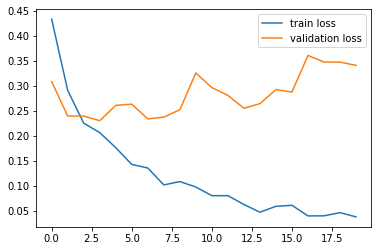

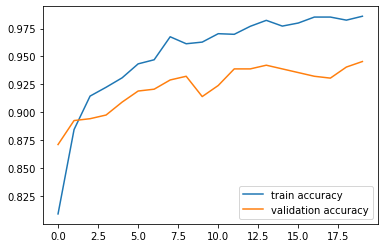

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


# loss is basically difference b/w true value and predicted value
# accuracy is how many corrected valus are present
# loss and accuracy both are inversly proportions 

Predicted system

Path of the image to be predicted: /content/data/without_mask/without_mask_1000.jpg


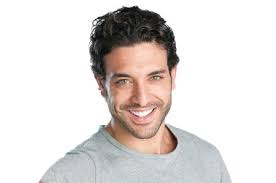

1/1 [==============================] - 0s 20ms/step
[[0.66959757 0.45815966]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3]) # here we predicted for only one image

input_prediction = model.predict(input_image_reshaped)

print(input_prediction) # in machine learing we get the values as 0 and 1 but in keras we want to get the probability values


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:
  

  print('The person in the image is not wearing a mask')
